# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [5]:
# add path to function path to sys path

import os
import sys
module_path = os.path.abspath(os.path.join('C:\Users\charl\Documents\GitHub\GGCW_GBDX_tools\Functions'))  # add funciotns directory to system path
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
### home made functions
import nice_functions as nf
reload(nf)

import get_OSM_polygons as getOSM
reload(getOSM)

### other libraries

import pandas as pd
import numpy as np
from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape, MultiPolygon
import matplotlib.pyplot as plt
%matplotlib inline

import fiona
import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()

In [7]:
city = 'Tbilisi'

In [8]:
pick = r'C:\Users\charl\Documents\GOST\Georgia\pickle'

import pickle

with open(os.path.join(pick, 'selection_objects_all_{}.pickle'.format(city)), 'rb') as handle:
    selection_all = pickle.load(handle)
    
with open(os.path.join(pick, 'geom_list_selection_all{}.pickle'.format(city)), 'rb') as handle:
    geom_list_selection_all = pickle.load(handle)

with open(os.path.join(pick, 'project_utm_{}.pickle'.format(city)), 'rb') as handle:
    project_utm = pickle.load(handle)
    
with open(os.path.join(pick, 'project_wgs_{}.pickle'.format(city)), 'rb') as handle:
    project_wgs = pickle.load(handle)
    
with open(os.path.join(pick, 'UTM_EPSG_code_{}.pickle'.format(city)), 'rb') as handle:
    UTM_EPSG_code = pickle.load(handle)

#### Set Variables


In [10]:
dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,
             'Grass': 2, 'Farmland': 2, 'Meadow' : 2, 'Fell' : 2, 'Heath' : 2, 'Grassland' : 2, 
             'Water': 3, 'Wetland': 3, 
             'Building': 4, 
             'Theatre': 0, 'Pitch':0}

buffer_size =  -10

label_all = np.array([])
data_all = np.array([])

##### Get image data for all polygons, Reproject WGS polygon to UTM polygon and apply mask, extract data to dataframe for use in machine learning algorithms


-----------------------------------------

image for OSM-way-62380275 is good object: 0
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


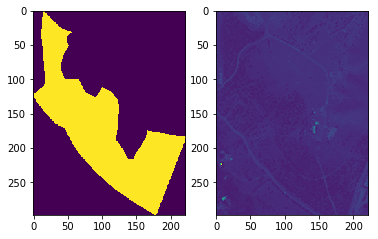

(66156L,)
(8L, 66156L)
-----------------------------------------

image for OSM-way-61976350 is good object: 1
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


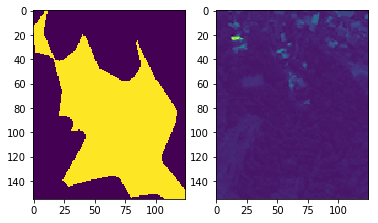

(85531L,)
(8L, 85531L)
-----------------------------------------

Multipolygon - skipping object: 2

-----------------------------------------

image for OSM-way-224459609 is good object: 3
2016-11-09T08:01:26.047Z
1030010061CF0900
Wood


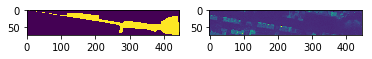

(117571L,)
(8L, 117571L)
-----------------------------------------

image for OSM-way-75659971 is good object: 4
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


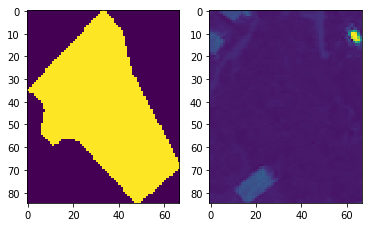

(123266L,)
(8L, 123266L)
-----------------------------------------

image for OSM-way-75237277 is good object: 5
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


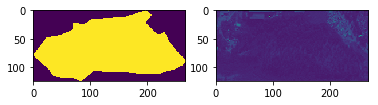

(156374L,)
(8L, 156374L)
-----------------------------------------

image for OSM-way-95490138 is good object: 6
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


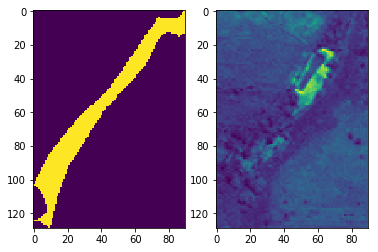

(167984L,)
(8L, 167984L)
-----------------------------------------

image for OSM-way-62944139 is good object: 7
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


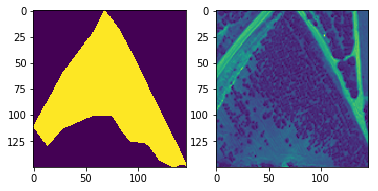

(189884L,)
(8L, 189884L)
-----------------------------------------

image for OSM-way-75589821 is good object: 8
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


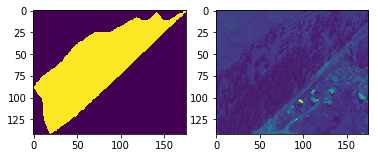

(214734L,)
(8L, 214734L)
-----------------------------------------

Multipolygon - skipping object: 9

-----------------------------------------

image for OSM-way-282632289 is good object: 10
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


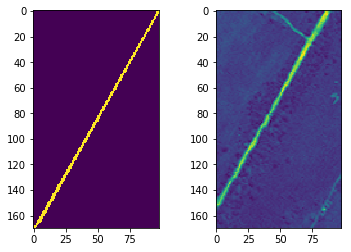

(231394L,)
(8L, 231394L)
-----------------------------------------

image for OSM-way-75610624 is good object: 11
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


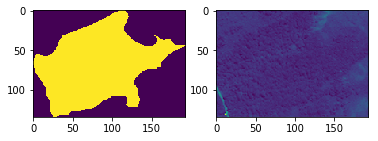

(257449L,)
(8L, 257449L)
-----------------------------------------

Multipolygon - skipping object: 12

-----------------------------------------

Multipolygon - skipping object: 13

-----------------------------------------

image for OSM-way-61060039 is good object: 14
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


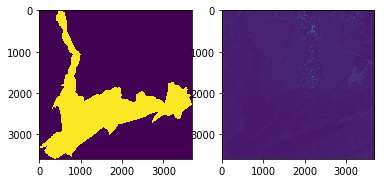

(13483102L,)
(8L, 13483102L)
-----------------------------------------

image for OSM-way-363443293 is good object: 15
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


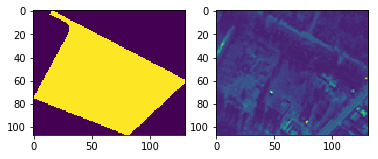

(13497119L,)
(8L, 13497119L)
-----------------------------------------

Multipolygon - skipping object: 16

-----------------------------------------

image for OSM-way-74042486 is good object: 17
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


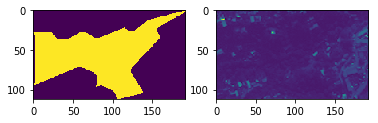

(13518623L,)
(8L, 13518623L)
-----------------------------------------

image for OSM-way-62690946 is good object: 18
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


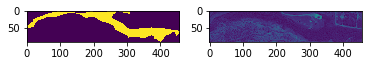

(13561031L,)
(8L, 13561031L)
-----------------------------------------

image for OSM-way-95488638 is good object: 19
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


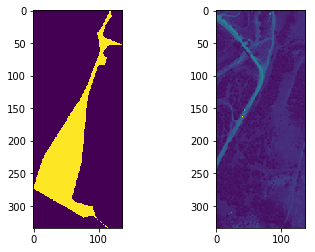

(13606789L,)
(8L, 13606789L)
-----------------------------------------

image for OSM-way-421642633 is good object: 20
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


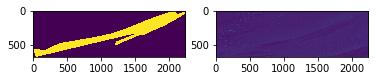

(15125033L,)
(8L, 15125033L)
-----------------------------------------

image for OSM-way-56396416 is good object: 21
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


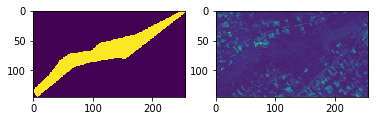

(15162153L,)
(8L, 15162153L)
-----------------------------------------

Multipolygon - skipping object: 22

-----------------------------------------

image for OSM-way-78521400 is good object: 23
2016-05-25T08:00:30.479Z
10300100570CBD00
Wood


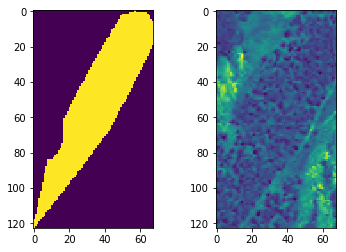

(15170517L,)
(8L, 15170517L)
-----------------------------------------

image for OSM-way-146184411 is good object: 24
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


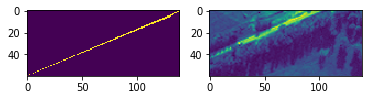

(15178857L,)
(8L, 15178857L)
-----------------------------------------

Multipolygon - skipping object: 25

-----------------------------------------

image for OSM-way-59606349 is good object: 26
2016-05-25T08:00:30.479Z
10300100570CBD00
Wood


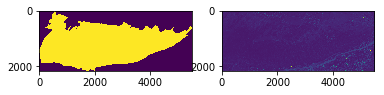

(27025101L,)
(8L, 27025101L)
-----------------------------------------

Multipolygon - skipping object: 27

-----------------------------------------

image for OSM-way-77869615 is good object: 28
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


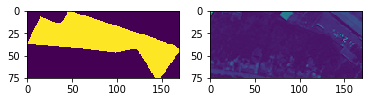

(27037851L,)
(8L, 27037851L)
-----------------------------------------

image for OSM-way-157910428 is good object: 29
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


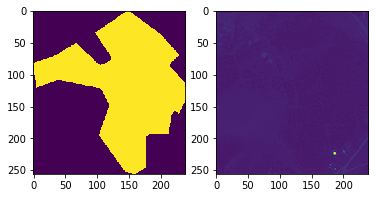

(27099035L,)
(8L, 27099035L)
-----------------------------------------

image for OSM-way-63679572 is good object: 30
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


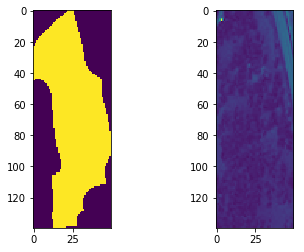

(27106035L,)
(8L, 27106035L)
-----------------------------------------

image for OSM-way-79949653 is good object: 31
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


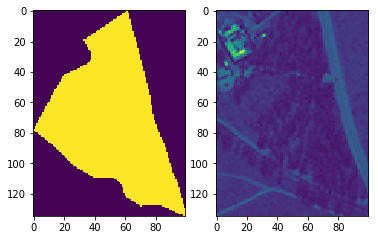

(27119535L,)
(8L, 27119535L)
-----------------------------------------

image for OSM-way-61605359 is good object: 32
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


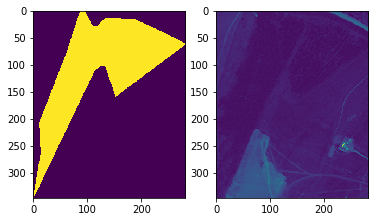

(27217389L,)
(8L, 27217389L)
-----------------------------------------

image for OSM-way-115938377 is good object: 33
2016-11-09T08:01:26.047Z
1030010061CF0900
Wood


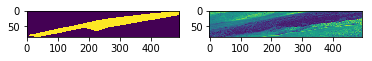

(27259209L,)
(8L, 27259209L)
-----------------------------------------

Multipolygon - skipping object: 34

-----------------------------------------

Multipolygon - skipping object: 35

-----------------------------------------

Multipolygon - skipping object: 36

-----------------------------------------

image for OSM-way-363442812 is good object: 37
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


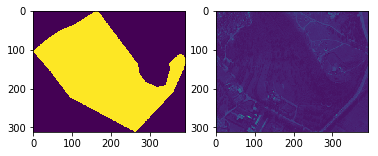

(27381513L,)
(8L, 27381513L)
-----------------------------------------

image for OSM-way-78295187 is good object: 38
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


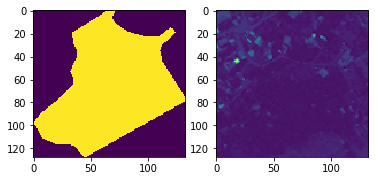

(27398537L,)
(8L, 27398537L)
-----------------------------------------

Multipolygon - skipping object: 39

-----------------------------------------

image for OSM-way-61726498 is good object: 40
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


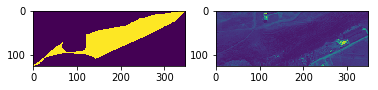

(27442385L,)
(8L, 27442385L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 42

-----------------------------------------

no image
-----------------------------------------

image for OSM-way-61605243 is good object: 44
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


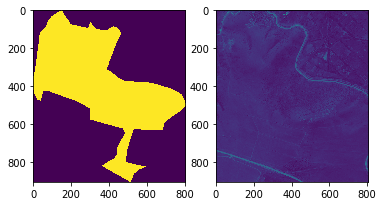

(28170809L,)
(8L, 28170809L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 46

-----------------------------------------

image for OSM-way-78518265 is good object: 47
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


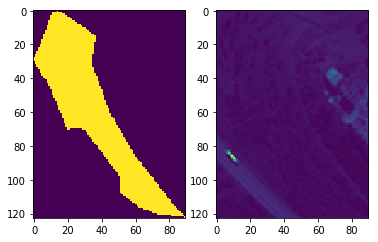

(28181879L,)
(8L, 28181879L)
-----------------------------------------

image for OSM-way-79107276 is good object: 48
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


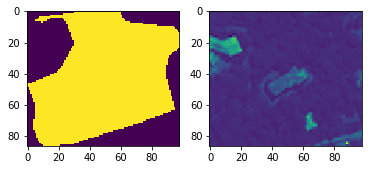

(28190405L,)
(8L, 28190405L)
-----------------------------------------

Multipolygon - skipping object: 49

-----------------------------------------

image for OSM-way-65353971 is good object: 50
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


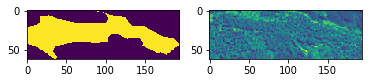

(28202433L,)
(8L, 28202433L)
-----------------------------------------

image for OSM-way-62456171 is good object: 51
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


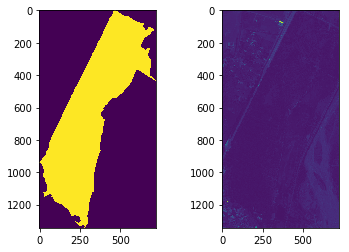

(29172801L,)
(8L, 29172801L)
-----------------------------------------

image for OSM-way-75379211 is good object: 52
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


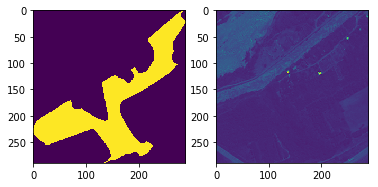

(29256611L,)
(8L, 29256611L)
-----------------------------------------

image for OSM-way-95489594 is good object: 53
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


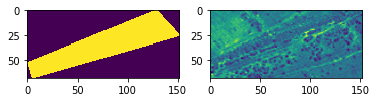

(29266947L,)
(8L, 29266947L)
-----------------------------------------

Multipolygon - skipping object: 54

-----------------------------------------

image for OSM-way-442292607 is good object: 55
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


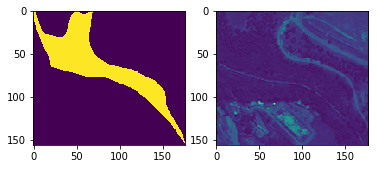

(29294559L,)
(8L, 29294559L)
-----------------------------------------

image for OSM-way-62691007 is good object: 56
2016-05-25T08:00:30.479Z
10300100570CBD00
Wood


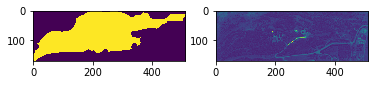

(29381087L,)
(8L, 29381087L)
-----------------------------------------

image for OSM-way-95489608 is good object: 57
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


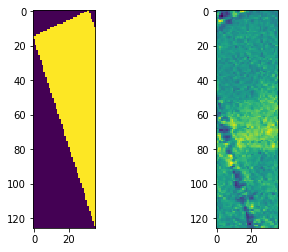

(29385623L,)
(8L, 29385623L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-75610965 is good object: 59
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


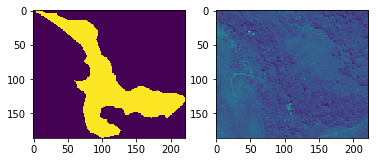

(29426915L,)
(8L, 29426915L)
-----------------------------------------

Multipolygon - skipping object: 60

-----------------------------------------

Multipolygon - skipping object: 61

-----------------------------------------

image for OSM-way-78537355 is good object: 62
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


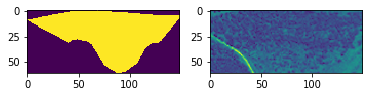

(29436004L,)
(8L, 29436004L)
-----------------------------------------

Multipolygon - skipping object: 63

-----------------------------------------

image for OSM-way-62127465 is good object: 64
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


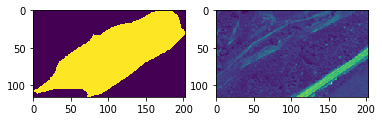

(29459552L,)
(8L, 29459552L)
-----------------------------------------

image for OSM-way-78489621 is good object: 65
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


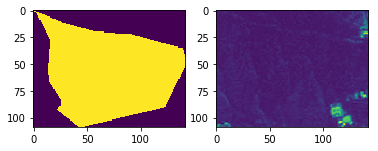

(29475030L,)
(8L, 29475030L)
-----------------------------------------

Multipolygon - skipping object: 66

-----------------------------------------

Multipolygon - skipping object: 67

-----------------------------------------

Multipolygon - skipping object: 68

-----------------------------------------

image for OSM-way-62783998 is good object: 69
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


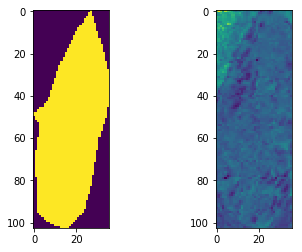

(29478738L,)
(8L, 29478738L)
-----------------------------------------

image for OSM-way-75542745 is good object: 70
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


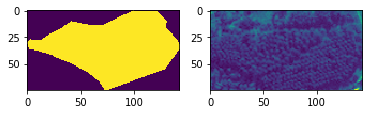

(29489463L,)
(8L, 29489463L)
-----------------------------------------

image for OSM-way-280328561 is good object: 71
2016-05-17T07:55:44.718Z
10300100543AA700
Wood


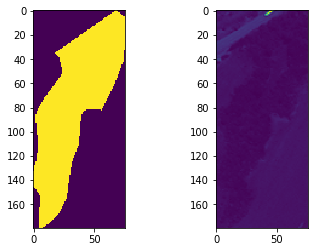

(29503143L,)
(8L, 29503143L)
-----------------------------------------

Multipolygon - skipping object: 72

-----------------------------------------

image for OSM-way-63679538 is good object: 73
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


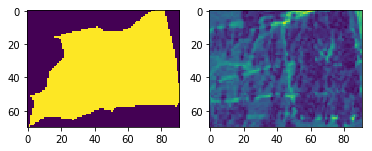

(29509513L,)
(8L, 29509513L)
-----------------------------------------

Multipolygon - skipping object: 74

-----------------------------------------

Multipolygon - skipping object: 75

-----------------------------------------

no image
-----------------------------------------

image for OSM-way-363443804 is good object: 77
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


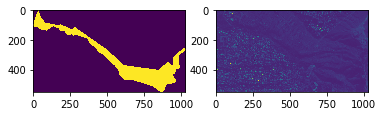

(30074913L,)
(8L, 30074913L)
-----------------------------------------

no image
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 80

-----------------------------------------

Multipolygon - skipping object: 81

-----------------------------------------

image for OSM-way-64690384 is good object: 82
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


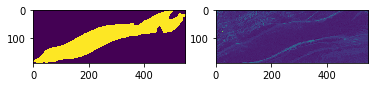

(30179223L,)
(8L, 30179223L)
-----------------------------------------

Multipolygon - skipping object: 83

-----------------------------------------

image for OSM-way-62944161 is good object: 84
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


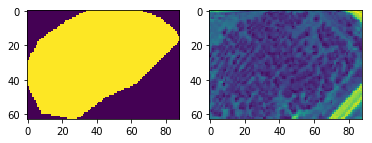

(30184767L,)
(8L, 30184767L)
-----------------------------------------

image for OSM-way-363445130 is good object: 85
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


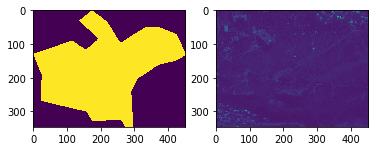

(30340813L,)
(8L, 30340813L)
-----------------------------------------

image for OSM-way-442292612 is good object: 86
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


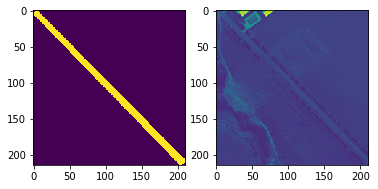

(30385967L,)
(8L, 30385967L)
-----------------------------------------

image for OSM-way-64014434 is good object: 87
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


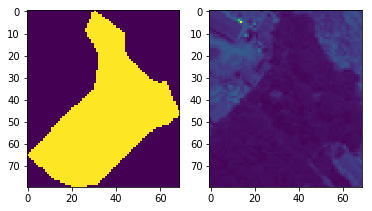

(30391487L,)
(8L, 30391487L)
-----------------------------------------

image for OSM-way-65372541 is good object: 88
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


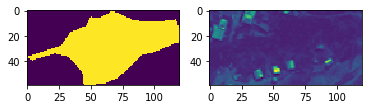

(30398567L,)
(8L, 30398567L)
-----------------------------------------

image for OSM-way-64014420 is good object: 89
2016-05-25T08:00:30.479Z
10300100570CBD00
Forest


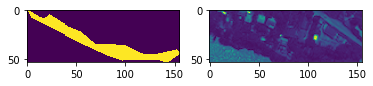

(30406782L,)
(8L, 30406782L)
-----------------------------------------

Multipolygon - skipping object: 90

-----------------------------------------

Multipolygon - skipping object: 91

-----------------------------------------

image for OSM-way-149853993 is good object: 92
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


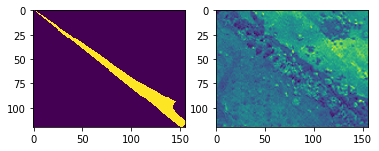

(30425502L,)
(8L, 30425502L)
-----------------------------------------

Multipolygon - skipping object: 93

-----------------------------------------

Multipolygon - skipping object: 94

-----------------------------------------

Multipolygon - skipping object: 95

-----------------------------------------

image for OSM-way-442292603 is good object: 96
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


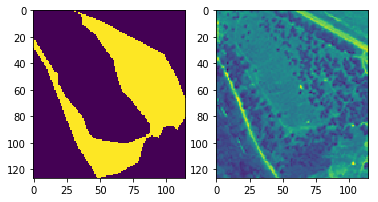

(30440107L,)
(8L, 30440107L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 98

-----------------------------------------

Multipolygon - skipping object: 99

-----------------------------------------

image for OSM-way-224459612 is good object: 100
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


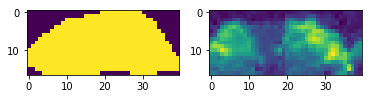

(30440787L,)
(8L, 30440787L)
-----------------------------------------

Multipolygon - skipping object: 101

-----------------------------------------

image for OSM-way-78517620 is good object: 102
2016-05-25T08:00:30.479Z
10300100570CBD00
Fell


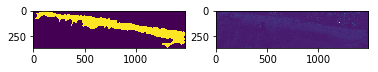

(30977995L,)
(8L, 30977995L)
-----------------------------------------

Multipolygon - skipping object: 103

-----------------------------------------

image for OSM-way-28400750 is good object: 104
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


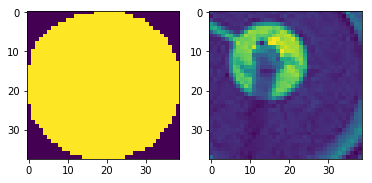

(30979477L,)
(8L, 30979477L)
-----------------------------------------

image for OSM-way-174899909 is good object: 105
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


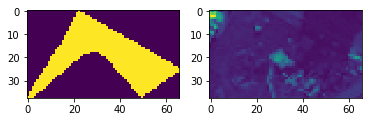

(30981985L,)
(8L, 30981985L)
-----------------------------------------

image for OSM-way-172933130 is good object: 106
2016-05-25T08:00:30.479Z
10300100570CBD00
Grass


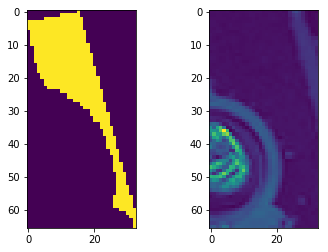

(30984163L,)
(8L, 30984163L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 108

-----------------------------------------

image for OSM-way-224960028 is good object: 109
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


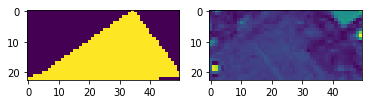

(30985313L,)
(8L, 30985313L)
-----------------------------------------

image for OSM-way-63958409 is good object: 110
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


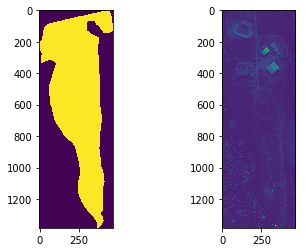

(31630257L,)
(8L, 31630257L)
-----------------------------------------

image for OSM-way-295697499 is good object: 111
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


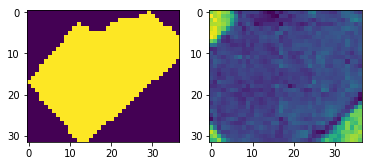

(31631441L,)
(8L, 31631441L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-120789463 is good object: 113
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


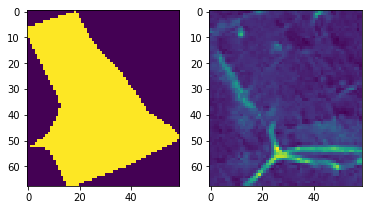

(31635453L,)
(8L, 31635453L)
-----------------------------------------

image for OSM-way-95611591 is good object: 114
2016-05-17T07:55:44.718Z
10300100543AA700
Heath


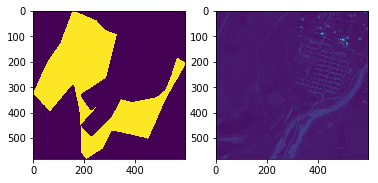

(31983489L,)
(8L, 31983489L)
-----------------------------------------

image for OSM-way-363705029 is good object: 115
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


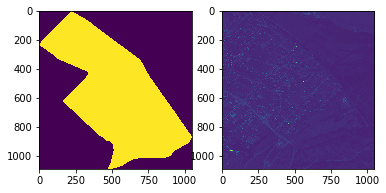

(33123713L,)
(8L, 33123713L)
-----------------------------------------

image for OSM-way-190581279 is good object: 116
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


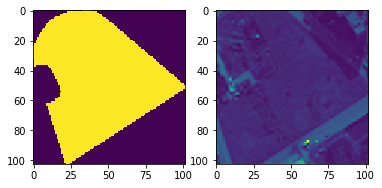

(33134219L,)
(8L, 33134219L)
-----------------------------------------

Multipolygon - skipping object: 117

-----------------------------------------

Multipolygon - skipping object: 118

-----------------------------------------

image for OSM-way-295850235 is good object: 119
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


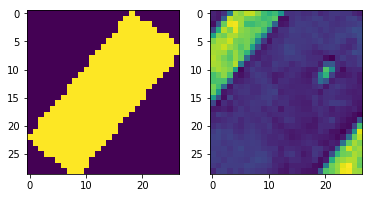

(33135002L,)
(8L, 33135002L)
-----------------------------------------

image for OSM-way-172933111 is good object: 120
2016-05-25T08:00:30.479Z
10300100570CBD00
Grass


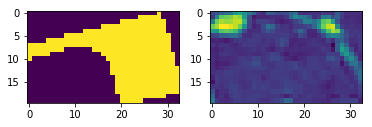

(33135662L,)
(8L, 33135662L)
-----------------------------------------

image for OSM-way-75376079 is good object: 121
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


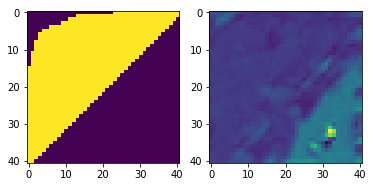

(33137343L,)
(8L, 33137343L)
-----------------------------------------

image for OSM-way-95513688 is good object: 122
2016-05-17T07:55:44.718Z
10300100543AA700
Heath


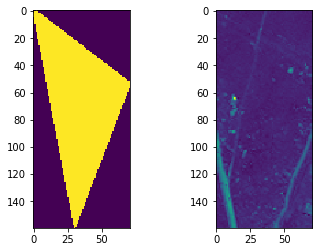

(33148703L,)
(8L, 33148703L)
-----------------------------------------

image for OSM-way-295850239 is good object: 123
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


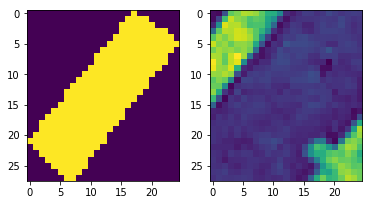

(33149403L,)
(8L, 33149403L)
-----------------------------------------

image for OSM-way-371722557 is good object: 124
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


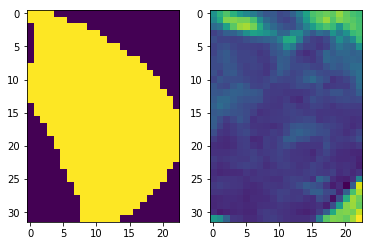

(33150139L,)
(8L, 33150139L)
-----------------------------------------

image for OSM-way-361889662 is good object: 125
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


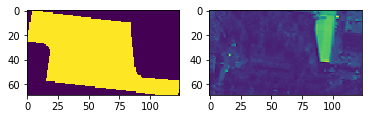

(33158695L,)
(8L, 33158695L)
-----------------------------------------

image for OSM-way-65082801 is good object: 126
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


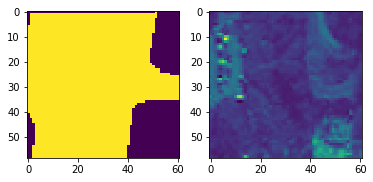

(33162294L,)
(8L, 33162294L)
-----------------------------------------

Multipolygon - skipping object: 127

-----------------------------------------

image for OSM-way-295850238 is good object: 128
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


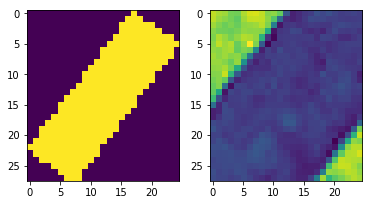

(33162994L,)
(8L, 33162994L)
-----------------------------------------

image for OSM-way-171198864 is good object: 129
2016-05-25T08:00:30.479Z
10300100570CBD00
Meadow


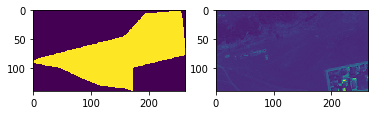

(33199954L,)
(8L, 33199954L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 131

-----------------------------------------

Multipolygon - skipping object: 132

-----------------------------------------

image for OSM-way-65372046 is good object: 133
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


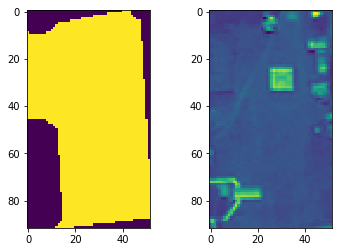

(33204738L,)
(8L, 33204738L)
-----------------------------------------

image for OSM-way-62672543 is good object: 134
2016-05-25T08:00:30.479Z
10300100570CBD00
Pitch


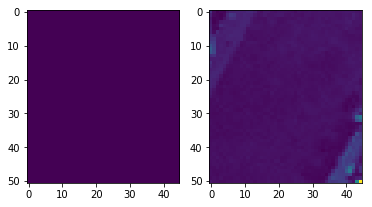

(33207033L,)
(8L, 33207033L)
-----------------------------------------

image for OSM-way-75659011 is good object: 135
2016-05-17T07:55:44.718Z
10300100543AA700
Grass


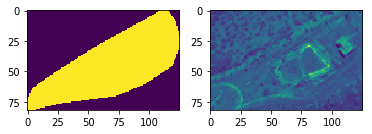

(33217283L,)
(8L, 33217283L)
-----------------------------------------

Multipolygon - skipping object: 136

-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 138

-----------------------------------------

image for OSM-way-95557713 is good object: 139
2016-05-17T07:55:44.718Z
10300100543AA700
Heath


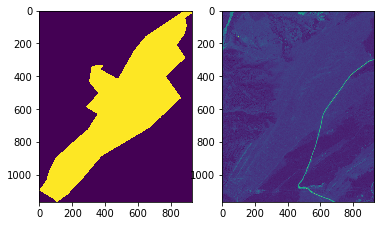

(34299331L,)
(8L, 34299331L)
-----------------------------------------

image for OSM-way-80378606 is good object: 140
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


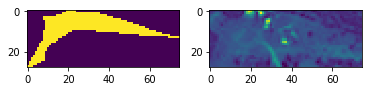

(34301431L,)
(8L, 34301431L)
-----------------------------------------

image for OSM-way-187631383 is good object: 141
2016-05-17T07:55:44.718Z
10300100543AA700
Grass


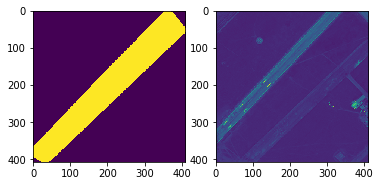

(34468301L,)
(8L, 34468301L)
-----------------------------------------

image for OSM-way-362739742 is good object: 142
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


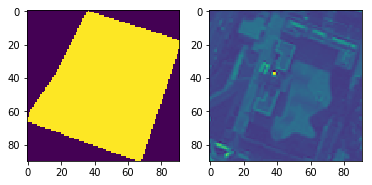

(34476491L,)
(8L, 34476491L)
-----------------------------------------

Multipolygon - skipping object: 143

-----------------------------------------

Multipolygon - skipping object: 144

-----------------------------------------

Multipolygon - skipping object: 145

-----------------------------------------

image for OSM-way-187631387 is good object: 146
2016-05-17T07:55:44.718Z
10300100543AA700
Grass


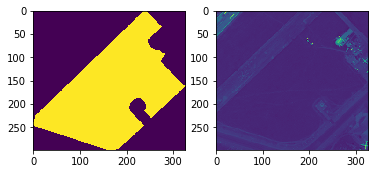

(34574264L,)
(8L, 34574264L)
-----------------------------------------

image for OSM-way-295848576 is good object: 147
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


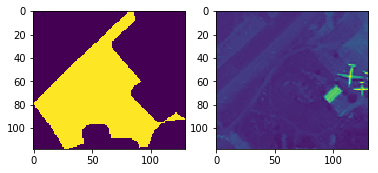

(34589604L,)
(8L, 34589604L)
-----------------------------------------

image for OSM-way-295697500 is good object: 148
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


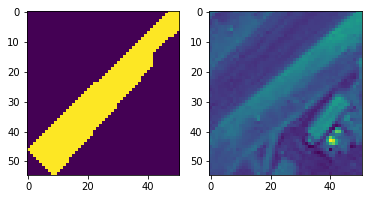

(34592409L,)
(8L, 34592409L)
-----------------------------------------

image for OSM-way-295849944 is good object: 149
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


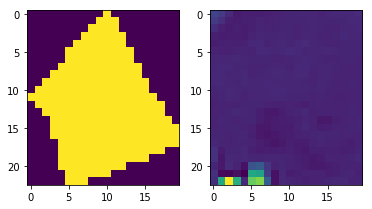

(34592869L,)
(8L, 34592869L)
-----------------------------------------

image for OSM-way-222869022 is good object: 150
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


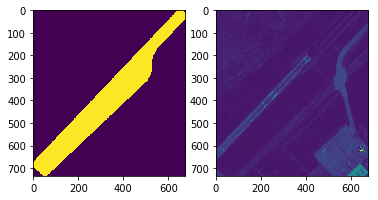

(35089729L,)
(8L, 35089729L)
-----------------------------------------

image for OSM-way-295848570 is good object: 151
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


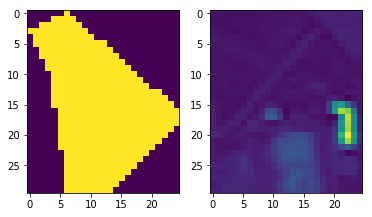

(35090479L,)
(8L, 35090479L)
-----------------------------------------

image for OSM-way-190581283 is good object: 152
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


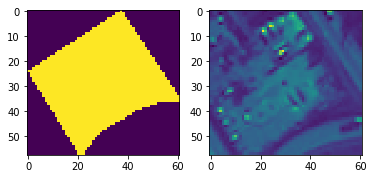

(35094017L,)
(8L, 35094017L)
-----------------------------------------

image defective
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-169088831 is good object: 155
2016-05-25T08:00:30.479Z
10300100570CBD00
Grass


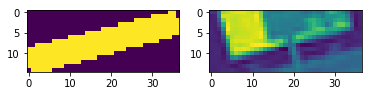

(35094572L,)
(8L, 35094572L)
-----------------------------------------

Multipolygon - skipping object: 156

-----------------------------------------

image for OSM-way-426542852 is good object: 157
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


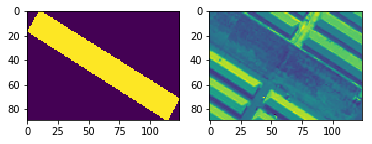

(35105608L,)
(8L, 35105608L)
-----------------------------------------

image for OSM-way-58415545 is good object: 158
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


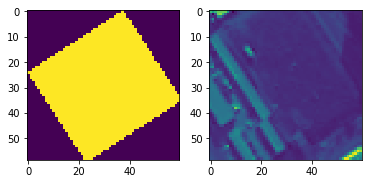

(35109148L,)
(8L, 35109148L)
-----------------------------------------

image for OSM-way-196094666 is good object: 159
2016-05-17T07:55:44.718Z
10300100543AA700
Grassland


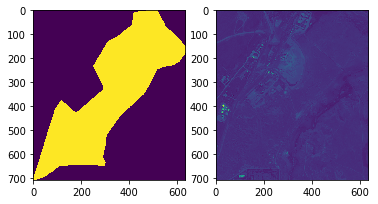

(35556752L,)
(8L, 35556752L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-62160880 is good object: 161
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


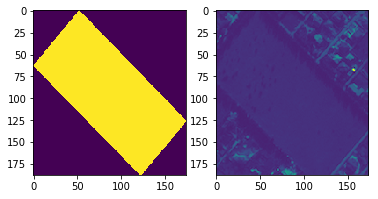

(35589464L,)
(8L, 35589464L)
-----------------------------------------

Multipolygon - skipping object: 162

-----------------------------------------

image for OSM-way-175851338 is good object: 163
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


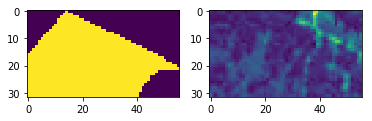

(35591256L,)
(8L, 35591256L)
-----------------------------------------

image for OSM-way-78521398 is good object: 164
2016-05-25T08:00:30.479Z
10300100570CBD00
Grass


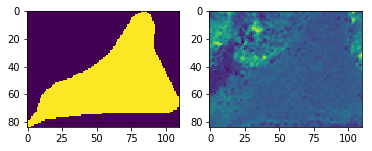

(35600496L,)
(8L, 35600496L)
-----------------------------------------

image for OSM-way-363703984 is good object: 165
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


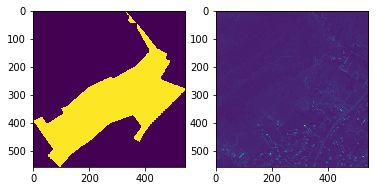

(35902404L,)
(8L, 35902404L)
-----------------------------------------

image for OSM-way-175851337 is good object: 166
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


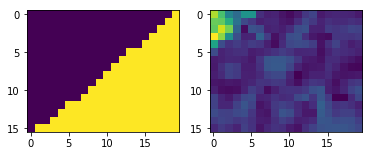

(35902724L,)
(8L, 35902724L)
-----------------------------------------

image for OSM-way-372670012 is good object: 167
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


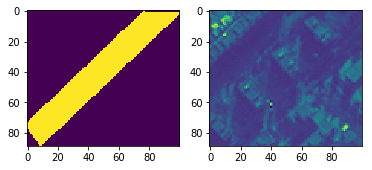

(35911624L,)
(8L, 35911624L)
-----------------------------------------

image for OSM-way-295850237 is good object: 168
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


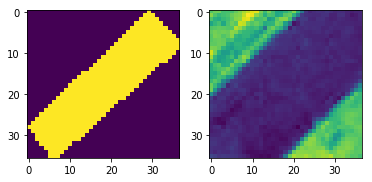

(35912956L,)
(8L, 35912956L)
-----------------------------------------

image for OSM-way-222869024 is good object: 169
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


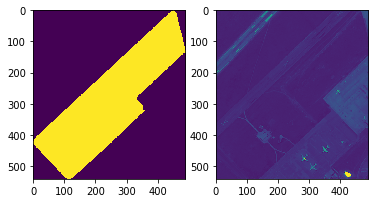

(36177994L,)
(8L, 36177994L)
-----------------------------------------

image for OSM-way-172933118 is good object: 170
2016-05-25T08:00:30.479Z
10300100570CBD00
Grass


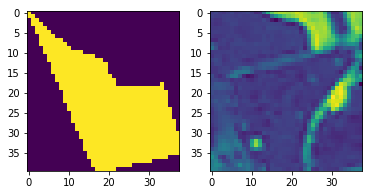

(36179514L,)
(8L, 36179514L)
-----------------------------------------

image for OSM-way-426542851 is good object: 171
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


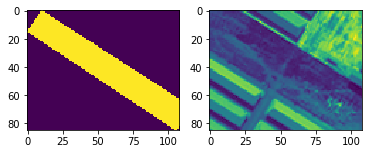

(36188694L,)
(8L, 36188694L)
-----------------------------------------

image for OSM-way-222869023 is good object: 172
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


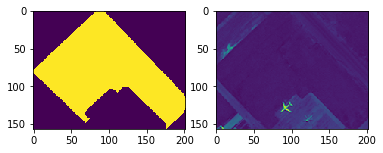

(36220408L,)
(8L, 36220408L)
-----------------------------------------

Multipolygon - skipping object: 173

-----------------------------------------

Multipolygon - skipping object: 174

-----------------------------------------

image for OSM-way-136484251 is good object: 175
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


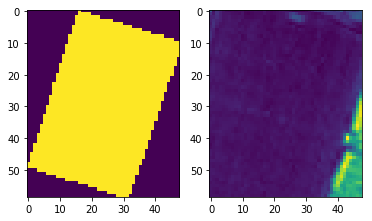

(36223240L,)
(8L, 36223240L)
-----------------------------------------

image for OSM-way-95058780 is good object: 176
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


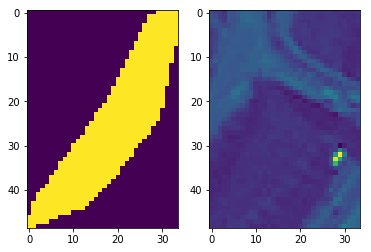

(36224906L,)
(8L, 36224906L)
-----------------------------------------

image for OSM-way-211244932 is good object: 177
2016-05-25T08:00:30.479Z
10300100570CBD00
Meadow


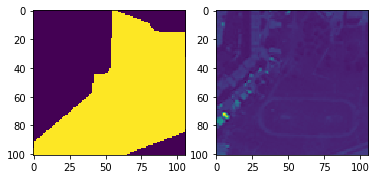

(36235612L,)
(8L, 36235612L)
-----------------------------------------

image for OSM-way-95641380 is good object: 178
2016-11-09T08:01:26.047Z
1030010061CF0900
Heath


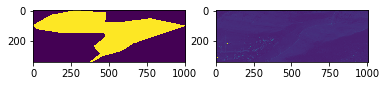

(36576307L,)
(8L, 36576307L)
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 180

-----------------------------------------

image for OSM-way-65283559 is good object: 181
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


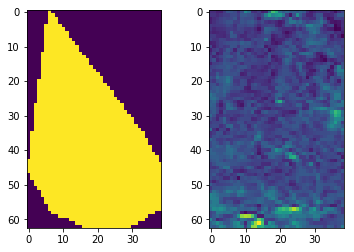

(36578764L,)
(8L, 36578764L)
-----------------------------------------

Multipolygon - skipping object: 182

-----------------------------------------

image for OSM-way-95493606 is good object: 183
2016-05-17T07:55:44.718Z
10300100543AA700
Heath


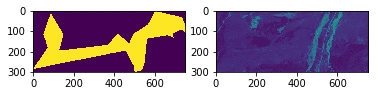

(36804064L,)
(8L, 36804064L)
-----------------------------------------

image for OSM-way-555793280 is good object: 184
2016-05-25T08:00:30.479Z
10300100570CBD00
Meadow


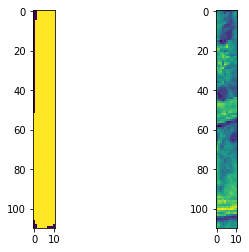

(36805274L,)
(8L, 36805274L)
-----------------------------------------

image for OSM-way-295811266 is good object: 185
2016-05-17T07:55:44.718Z
10300100543AA700
Meadow


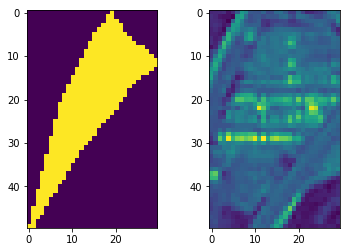

(36806774L,)
(8L, 36806774L)
-----------------------------------------

image for OSM-way-370159005 is good object: 186
2016-05-25T08:00:30.479Z
10300100570CBD00
Meadow


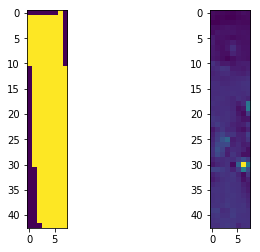

(36807118L,)
(8L, 36807118L)
-----------------------------------------

image for OSM-way-79910916 is good object: 187
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


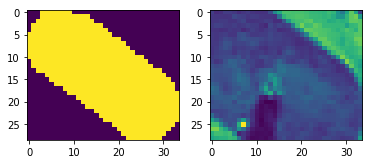

(36808104L,)
(8L, 36808104L)
-----------------------------------------

image for OSM-way-415286847 is good object: 188
2016-11-09T08:01:26.047Z
1030010061CF0900
Meadow


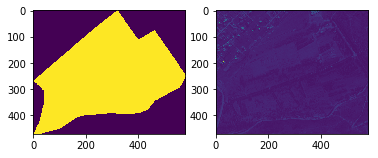

(37081755L,)
(8L, 37081755L)
-----------------------------------------

Multipolygon - skipping object: 189

-----------------------------------------

Multipolygon - skipping object: 190

-----------------------------------------

image for OSM-way-62444677 is good object: 191
2016-05-17T07:55:44.718Z
10300100543AA700
Water


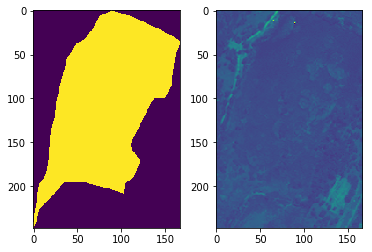

(37123171L,)
(8L, 37123171L)
-----------------------------------------

image for OSM-way-295949193 is good object: 192
2016-05-17T07:55:44.718Z
10300100543AA700
Water


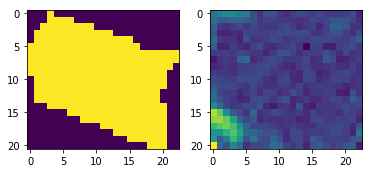

(37123654L,)
(8L, 37123654L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-59530670 is good object: 194
2016-05-17T07:55:44.718Z
10300100543AA700
Water


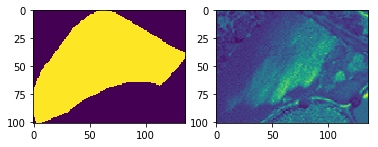

(37137390L,)
(8L, 37137390L)
-----------------------------------------

image for OSM-way-61608311 is good object: 195
2016-05-17T07:55:44.718Z
10300100543AA700
Water


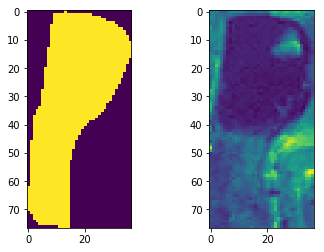

(37140239L,)
(8L, 37140239L)
-----------------------------------------

image for OSM-way-61460010 is good object: 196
2016-05-17T07:55:44.718Z
10300100543AA700
Water


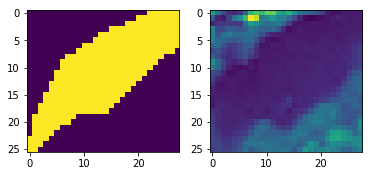

(37140967L,)
(8L, 37140967L)
-----------------------------------------

Multipolygon - skipping object: 197

-----------------------------------------

image for OSM-way-63956649 is good object: 198
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


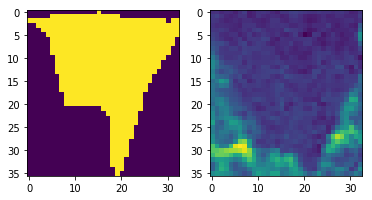

(37142155L,)
(8L, 37142155L)
-----------------------------------------

image for OSM-way-20642261 is good object: 199
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


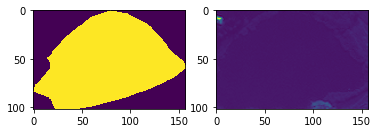

(37158169L,)
(8L, 37158169L)
-----------------------------------------

image for OSM-way-61608330 is good object: 200
2016-05-17T07:55:44.718Z
10300100543AA700
Water


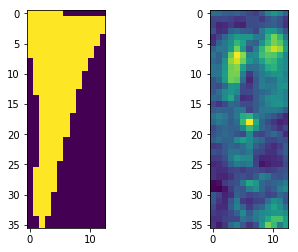

(37158637L,)
(8L, 37158637L)
-----------------------------------------

image for OSM-way-61892339 is good object: 201
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


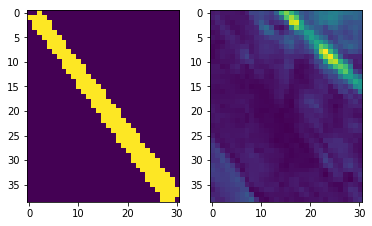

(37159846L,)
(8L, 37159846L)
-----------------------------------------

image for OSM-way-28043570 is good object: 202
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


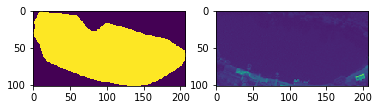

(37180960L,)
(8L, 37180960L)
-----------------------------------------

image for OSM-way-63956647 is good object: 203
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


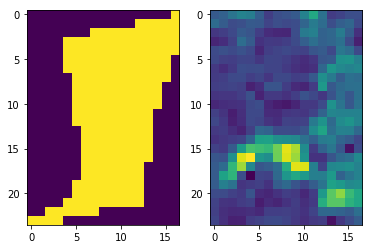

(37181368L,)
(8L, 37181368L)
-----------------------------------------

image for OSM-way-57953880 is good object: 204
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


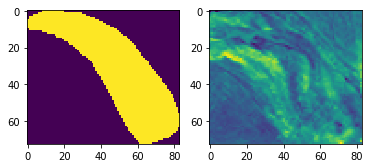

(37187427L,)
(8L, 37187427L)
-----------------------------------------

image for OSM-way-61436209 is good object: 205
2016-05-17T07:55:44.718Z
10300100543AA700
Water


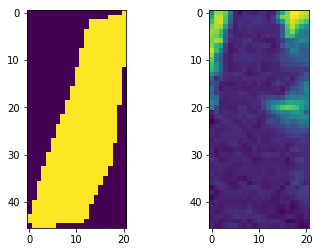

(37188393L,)
(8L, 37188393L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-295949196 is good object: 207
2016-05-17T07:55:44.718Z
10300100543AA700
Water


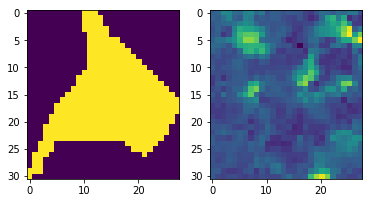

(37189261L,)
(8L, 37189261L)
-----------------------------------------

image for OSM-way-58152117 is good object: 208
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


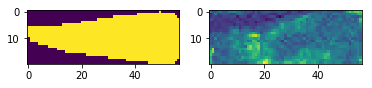

(37190401L,)
(8L, 37190401L)
-----------------------------------------

image for OSM-way-62444524 is good object: 209
2016-05-17T07:55:44.718Z
10300100543AA700
Water


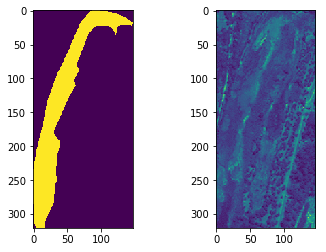

(37237588L,)
(8L, 37237588L)
-----------------------------------------

image for OSM-way-20574622 is good object: 210
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


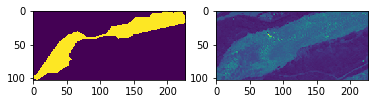

(37260969L,)
(8L, 37260969L)
-----------------------------------------

image for OSM-way-80375572 is good object: 211
2016-05-17T07:55:44.718Z
10300100543AA700
Water


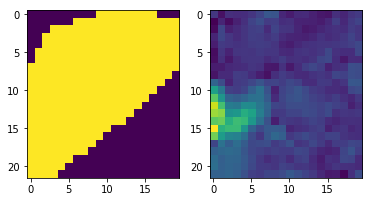

(37261409L,)
(8L, 37261409L)
-----------------------------------------

image for OSM-way-63956640 is good object: 212
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


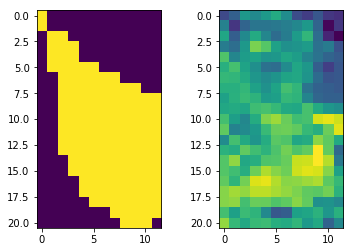

(37261661L,)
(8L, 37261661L)
-----------------------------------------

image for OSM-way-63619625 is good object: 213
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


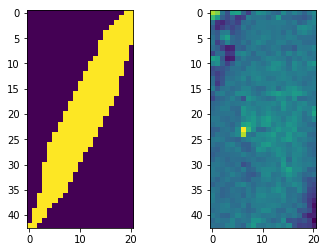

(37262564L,)
(8L, 37262564L)
-----------------------------------------

image for OSM-way-61461712 is good object: 214
2016-05-17T07:55:44.718Z
10300100543AA700
Water


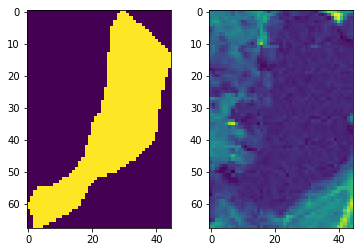

(37265624L,)
(8L, 37265624L)
-----------------------------------------

image defective
-----------------------------------------

Multipolygon - skipping object: 216

-----------------------------------------

image for OSM-way-61653469 is good object: 217
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


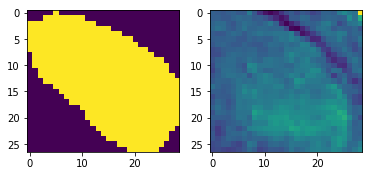

(37266407L,)
(8L, 37266407L)
-----------------------------------------

image for OSM-way-61436205 is good object: 218
2016-05-17T07:55:44.718Z
10300100543AA700
Water


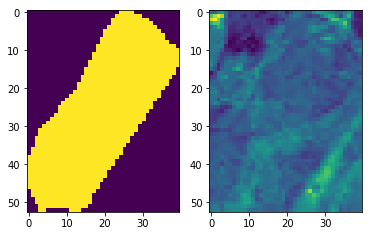

(37268527L,)
(8L, 37268527L)
-----------------------------------------

image for OSM-way-33767672 is good object: 219
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


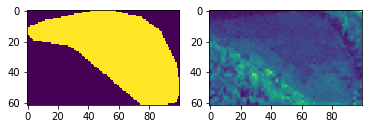

(37274727L,)
(8L, 37274727L)
-----------------------------------------

image for OSM-way-61650671 is good object: 220
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


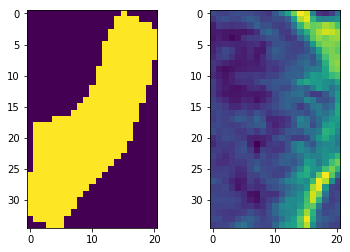

(37275462L,)
(8L, 37275462L)
-----------------------------------------

image for OSM-way-59530668 is good object: 221
2016-05-17T07:55:44.718Z
10300100543AA700
Water


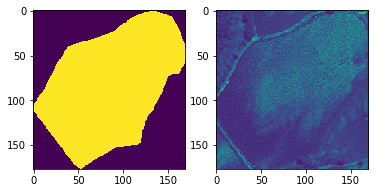

(37305552L,)
(8L, 37305552L)
-----------------------------------------

image for OSM-way-20574925 is good object: 222
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


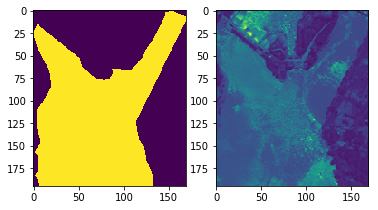

(37338507L,)
(8L, 37338507L)
-----------------------------------------

image for OSM-way-167318961 is good object: 223
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


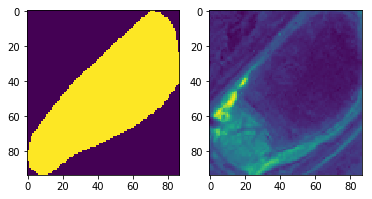

(37346685L,)
(8L, 37346685L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-20575140 is good object: 225
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


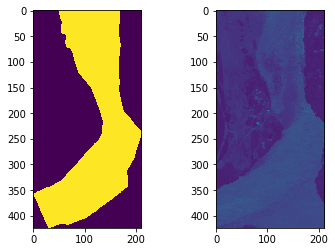

(37436149L,)
(8L, 37436149L)
-----------------------------------------

Multipolygon - skipping object: 226

-----------------------------------------

Multipolygon - skipping object: 227

-----------------------------------------

image for OSM-way-62444841 is good object: 228
2016-05-17T07:55:44.718Z
10300100543AA700
Water


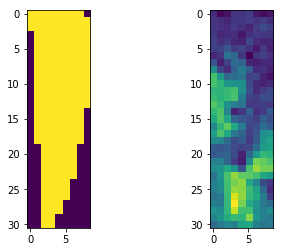

(37436428L,)
(8L, 37436428L)
-----------------------------------------

image for OSM-way-33767491 is good object: 229
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


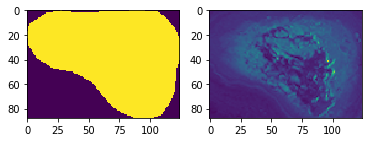

(37447340L,)
(8L, 37447340L)
-----------------------------------------

image for OSM-way-59467812 is good object: 230
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


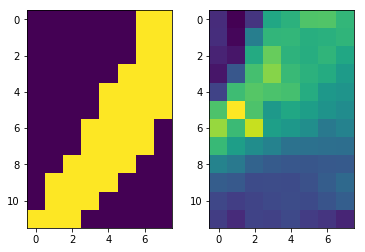

(37447436L,)
(8L, 37447436L)
-----------------------------------------

Multipolygon - skipping object: 231

-----------------------------------------

Multipolygon - skipping object: 232

-----------------------------------------

image for OSM-way-59858382 is good object: 233
2016-05-17T07:55:44.718Z
10300100543AA700
Water


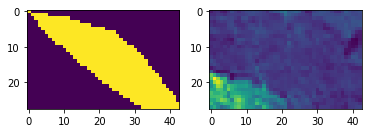

(37448640L,)
(8L, 37448640L)
-----------------------------------------

image for OSM-way-59530669 is good object: 234
2016-05-17T07:55:44.718Z
10300100543AA700
Water


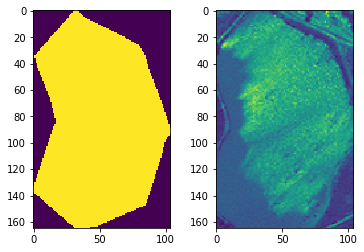

(37465800L,)
(8L, 37465800L)
-----------------------------------------

image for OSM-way-61608317 is good object: 235
2016-05-17T07:55:44.718Z
10300100543AA700
Water


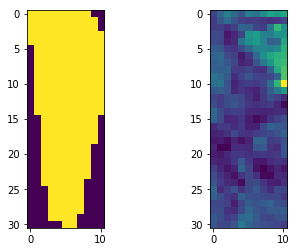

(37466141L,)
(8L, 37466141L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-62444483 is good object: 237
2016-05-17T07:55:44.718Z
10300100543AA700
Water


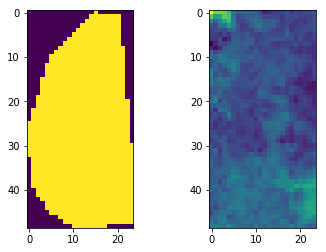

(37467317L,)
(8L, 37467317L)
-----------------------------------------

image for OSM-way-62449591 is good object: 238
2016-05-17T07:55:44.718Z
10300100543AA700
Water


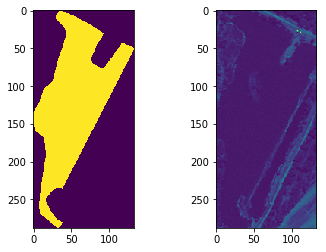

(37505621L,)
(8L, 37505621L)
-----------------------------------------

image for OSM-way-59588447 is good object: 239
2016-05-17T07:55:44.718Z
10300100543AA700
Water


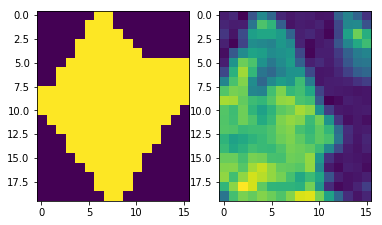

(37505941L,)
(8L, 37505941L)
-----------------------------------------

image for OSM-way-62444730 is good object: 240
2016-05-17T07:55:44.718Z
10300100543AA700
Water


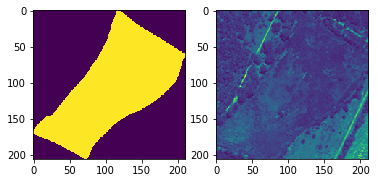

(37549407L,)
(8L, 37549407L)
-----------------------------------------

image for OSM-way-283556418 is good object: 241
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


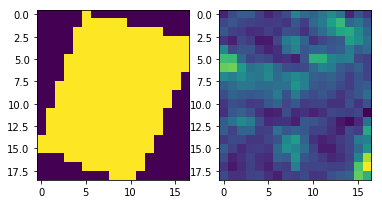

(37549730L,)
(8L, 37549730L)
-----------------------------------------

Multipolygon - skipping object: 242

-----------------------------------------

image for OSM-way-61623363 is good object: 243
2016-05-17T07:55:44.718Z
10300100543AA700
Water


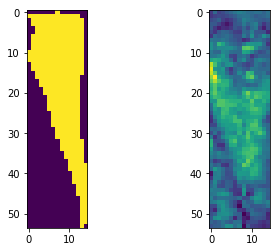

(37550540L,)
(8L, 37550540L)
-----------------------------------------

image for OSM-way-169617272 is good object: 244
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


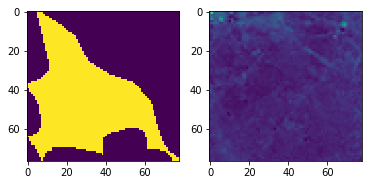

(37556546L,)
(8L, 37556546L)
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-112309247 is good object: 246
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


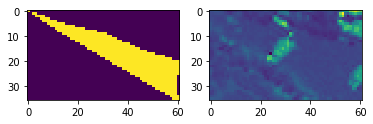

(37558742L,)
(8L, 37558742L)
-----------------------------------------

image for OSM-way-57786887 is good object: 247
2016-05-17T07:55:44.718Z
10300100543AA700
Water


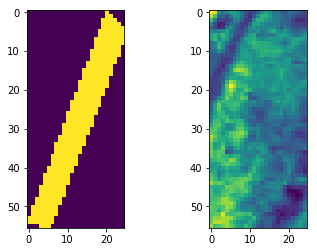

(37560142L,)
(8L, 37560142L)
-----------------------------------------

image for OSM-way-57786889 is good object: 248
2016-05-17T07:55:44.718Z
10300100543AA700
Water


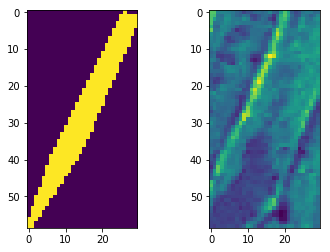

(37561912L,)
(8L, 37561912L)
-----------------------------------------

image for OSM-way-59530667 is good object: 249
2016-05-17T07:55:44.718Z
10300100543AA700
Water


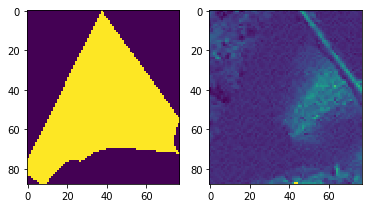

(37568688L,)
(8L, 37568688L)
-----------------------------------------

image for OSM-way-20574515 is good object: 250
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


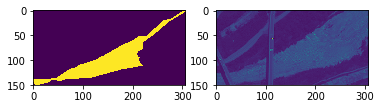

(37614738L,)
(8L, 37614738L)
-----------------------------------------

image for OSM-way-61650673 is good object: 251
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


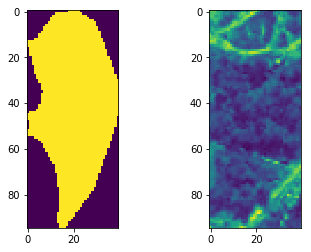

(37618538L,)
(8L, 37618538L)
-----------------------------------------

image for OSM-way-525901433 is good object: 252
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


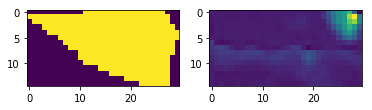

(37618988L,)
(8L, 37618988L)
-----------------------------------------

image for OSM-way-20574791 is good object: 253
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


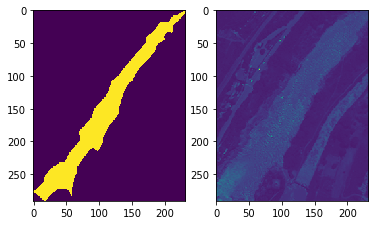

(37686500L,)
(8L, 37686500L)
-----------------------------------------

image for OSM-way-62444495 is good object: 254
2016-05-17T07:55:44.718Z
10300100543AA700
Water


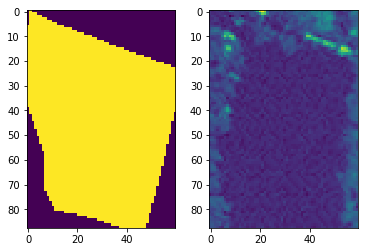

(37691780L,)
(8L, 37691780L)
-----------------------------------------

Multipolygon - skipping object: 255

-----------------------------------------

image for OSM-way-20841667 is good object: 256
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


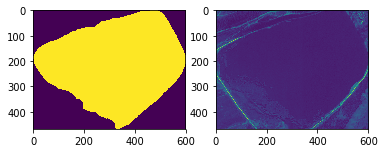

(37971513L,)
(8L, 37971513L)
-----------------------------------------

image for OSM-way-63114097 is good object: 257
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


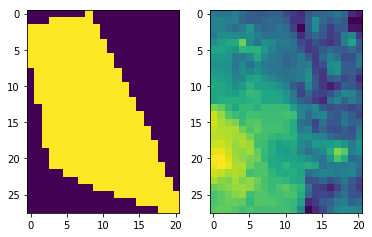

(37972101L,)
(8L, 37972101L)
-----------------------------------------

image for OSM-way-61650647 is good object: 258
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


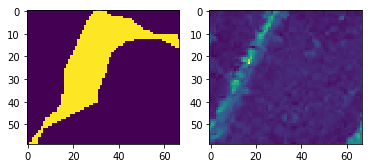

(37976054L,)
(8L, 37976054L)
-----------------------------------------

image for OSM-way-59546768 is good object: 259
2016-05-17T07:55:44.718Z
10300100543AA700
Water


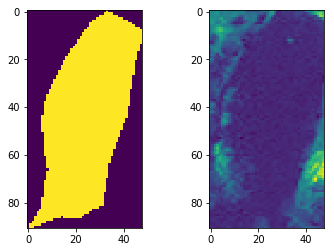

(37980422L,)
(8L, 37980422L)
-----------------------------------------

image for OSM-way-81145818 is good object: 260
2016-05-17T07:55:44.718Z
10300100543AA700
Water


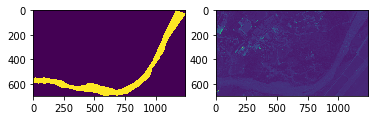

(38844702L,)
(8L, 38844702L)
-----------------------------------------

image for OSM-way-74961923 is good object: 261
2016-05-17T07:55:44.718Z
10300100543AA700
Water


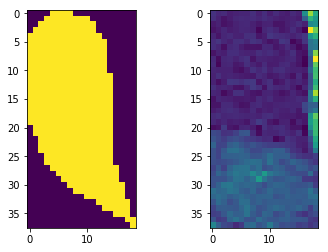

(38845424L,)
(8L, 38845424L)
-----------------------------------------

image defective
-----------------------------------------

image for OSM-way-81141885 is good object: 263
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


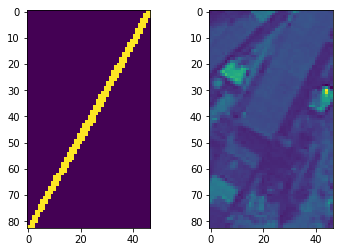

(38849325L,)
(8L, 38849325L)
-----------------------------------------

image for OSM-way-127758184 is good object: 264
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


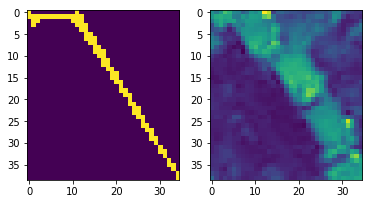

(38850690L,)
(8L, 38850690L)
-----------------------------------------

image for OSM-way-63766749 is good object: 265
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


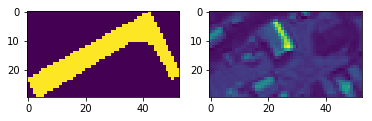

(38852280L,)
(8L, 38852280L)
-----------------------------------------

image for OSM-way-295856891 is good object: 266
2016-05-17T07:55:44.718Z
10300100543AA700
Building


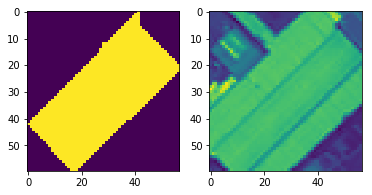

(38855700L,)
(8L, 38855700L)
-----------------------------------------

image for OSM-way-61957175 is good object: 267
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


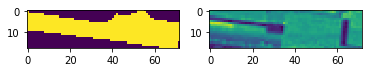

(38856996L,)
(8L, 38856996L)
-----------------------------------------

image for OSM-way-58436915 is good object: 268
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


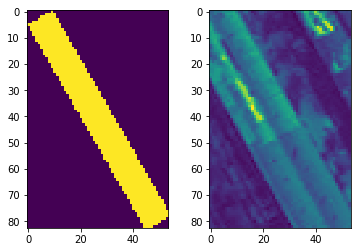

(38861478L,)
(8L, 38861478L)
-----------------------------------------

image for OSM-way-58095960 is good object: 269
2016-05-17T07:55:44.718Z
10300100543AA700
Building


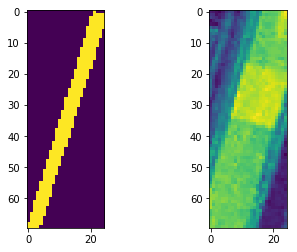

(38863228L,)
(8L, 38863228L)
-----------------------------------------

Multipolygon - skipping object: 270

-----------------------------------------

image for OSM-way-57941383 is good object: 271
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


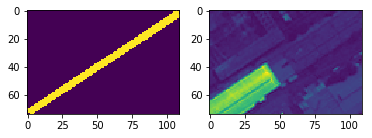

(38871294L,)
(8L, 38871294L)
-----------------------------------------

Multipolygon - skipping object: 272

-----------------------------------------

Multipolygon - skipping object: 273

-----------------------------------------

Multipolygon - skipping object: 274

-----------------------------------------

image for OSM-way-336800854 is good object: 275
2016-05-17T07:55:44.718Z
10300100543AA700
Building


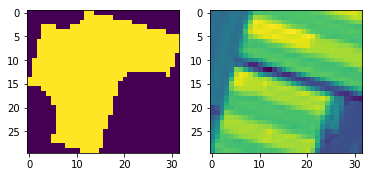

(38872254L,)
(8L, 38872254L)
-----------------------------------------

image for OSM-way-79093971 is good object: 276
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


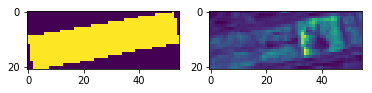

(38873409L,)
(8L, 38873409L)
-----------------------------------------

image for OSM-way-57941386 is good object: 277
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


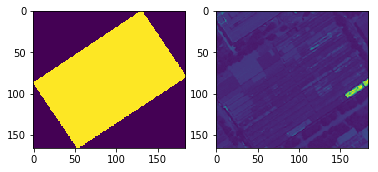

(38903953L,)
(8L, 38903953L)
-----------------------------------------

image for OSM-way-62187310 is good object: 278
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


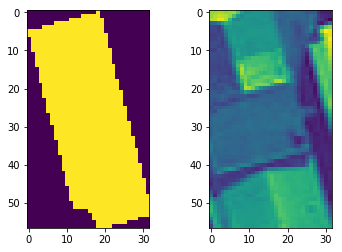

(38905777L,)
(8L, 38905777L)
-----------------------------------------

image for OSM-way-77767865 is good object: 279
2016-05-17T07:55:44.718Z
10300100543AA700
Building


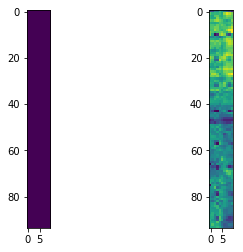

(38906717L,)
(8L, 38906717L)
-----------------------------------------

Multipolygon - skipping object: 280

-----------------------------------------

image for OSM-way-62154959 is good object: 281
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


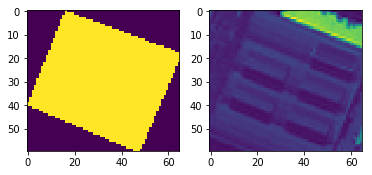

(38910617L,)
(8L, 38910617L)
-----------------------------------------

image for OSM-way-58756399 is good object: 282
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


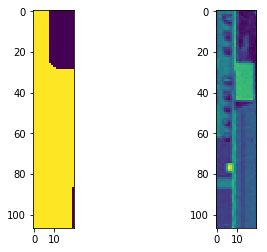

(38912757L,)
(8L, 38912757L)
-----------------------------------------

image for OSM-way-62230993 is good object: 283
2016-05-17T07:55:44.718Z
10300100543AA700
Building


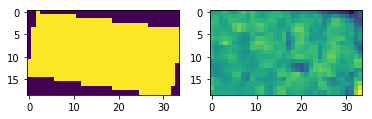

(38913403L,)
(8L, 38913403L)
-----------------------------------------

image for OSM-way-59466197 is good object: 284
2016-05-17T07:55:44.718Z
10300100543AA700
Building


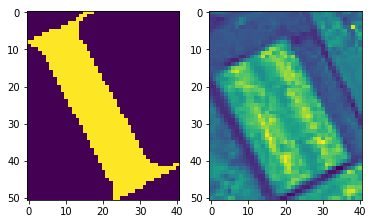

(38915494L,)
(8L, 38915494L)
-----------------------------------------

Multipolygon - skipping object: 285

-----------------------------------------

image for OSM-way-62085426 is good object: 286
2016-05-17T07:55:44.718Z
10300100543AA700
Building


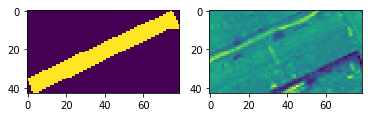

(38918891L,)
(8L, 38918891L)
-----------------------------------------

image for OSM-way-422389476 is good object: 287
2016-05-17T07:55:44.718Z
10300100543AA700
Building


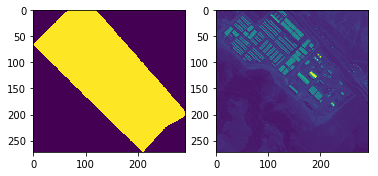

(38998315L,)
(8L, 38998315L)
-----------------------------------------

image for OSM-way-78298966 is good object: 288
2016-05-17T07:55:44.718Z
10300100543AA700
Building


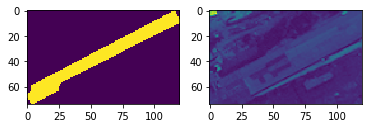

(39007195L,)
(8L, 39007195L)
-----------------------------------------

image for OSM-way-188451600 is good object: 289
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


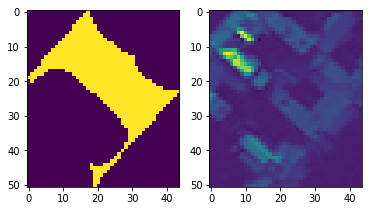

(39009439L,)
(8L, 39009439L)
-----------------------------------------

image for OSM-way-334067688 is good object: 290
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


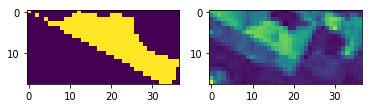

(39010105L,)
(8L, 39010105L)
-----------------------------------------

image for OSM-way-188559191 is good object: 291
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


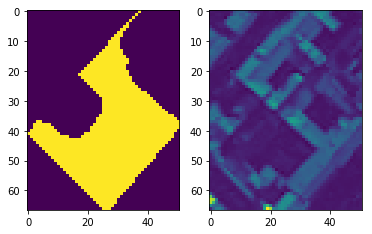

(39013522L,)
(8L, 39013522L)
-----------------------------------------

image for OSM-way-58124626 is good object: 292
2016-05-17T07:55:44.718Z
10300100543AA700
Building


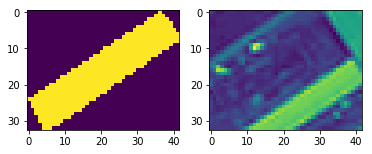

(39014908L,)
(8L, 39014908L)
-----------------------------------------

image for OSM-way-260078318 is good object: 293
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


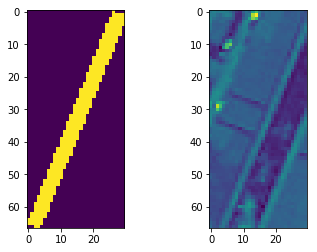

(39016918L,)
(8L, 39016918L)
-----------------------------------------

image for OSM-way-56125362 is good object: 294
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


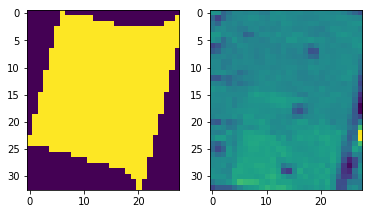

(39017842L,)
(8L, 39017842L)
-----------------------------------------

image for OSM-way-59587098 is good object: 295
2016-05-17T07:55:44.718Z
10300100543AA700
Building


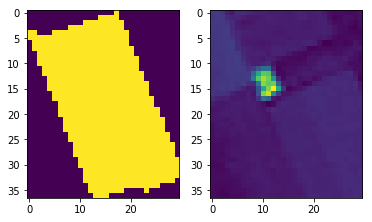

(39018952L,)
(8L, 39018952L)
-----------------------------------------

image for OSM-way-62231007 is good object: 296
2016-05-17T07:55:44.718Z
10300100543AA700
Building


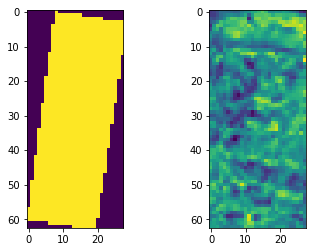

(39020716L,)
(8L, 39020716L)
-----------------------------------------

image for OSM-way-61606283 is good object: 297
2016-05-17T07:55:44.718Z
10300100543AA700
Building


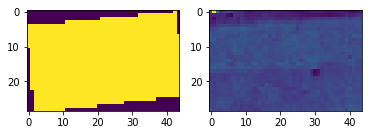

(39021992L,)
(8L, 39021992L)
-----------------------------------------

image for OSM-way-463044249 is good object: 298
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


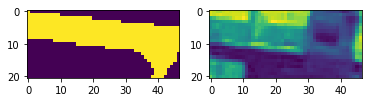

(39022979L,)
(8L, 39022979L)
-----------------------------------------

image for OSM-way-26445051 is good object: 299
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


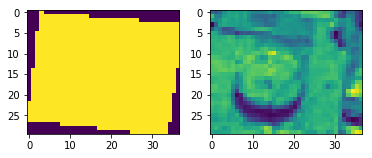

(39024089L,)
(8L, 39024089L)
-----------------------------------------

Multipolygon - skipping object: 300

-----------------------------------------

image for OSM-way-370153478 is good object: 301
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


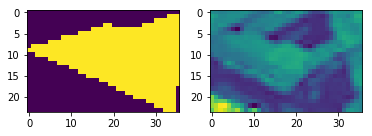

(39024953L,)
(8L, 39024953L)
-----------------------------------------

image for OSM-way-61606282 is good object: 302
2016-05-17T07:55:44.718Z
10300100543AA700
Building


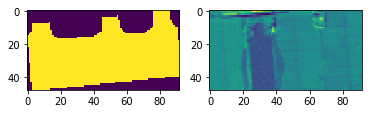

(39029369L,)
(8L, 39029369L)
-----------------------------------------

Multipolygon - skipping object: 303

-----------------------------------------

Multipolygon - skipping object: 304

-----------------------------------------

image for OSM-way-63614081 is good object: 305
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


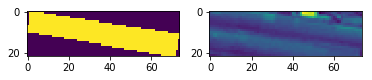

(39030997L,)
(8L, 39030997L)
-----------------------------------------

image for OSM-way-371135197 is good object: 306
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


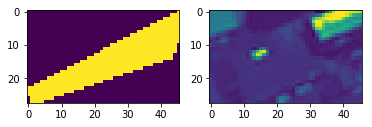

(39032285L,)
(8L, 39032285L)
-----------------------------------------

image for OSM-way-78164383 is good object: 307
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


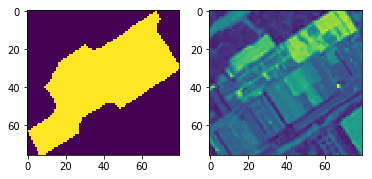

(39038365L,)
(8L, 39038365L)
-----------------------------------------

Multipolygon - skipping object: 308

-----------------------------------------

image for OSM-way-61113326 is good object: 309
2016-05-17T07:55:44.718Z
10300100543AA700
Building


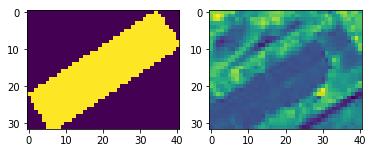

(39039677L,)
(8L, 39039677L)
-----------------------------------------

image for OSM-way-75402819 is good object: 310
2016-05-17T07:55:44.718Z
10300100543AA700
Building


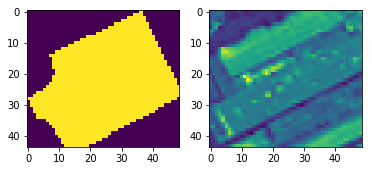

(39041833L,)
(8L, 39041833L)
-----------------------------------------

image for OSM-way-57711704 is good object: 311
2016-05-17T07:55:44.718Z
10300100543AA700
Building


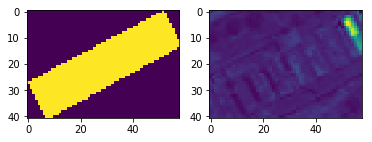

(39044211L,)
(8L, 39044211L)
-----------------------------------------

Multipolygon - skipping object: 312

-----------------------------------------

Multipolygon - skipping object: 313

-----------------------------------------

image for OSM-way-62231037 is good object: 314
2016-05-17T07:55:44.718Z
10300100543AA700
Building


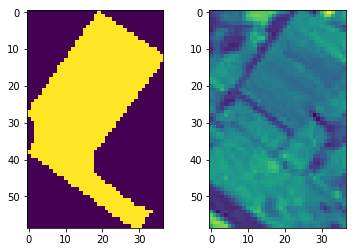

(39046394L,)
(8L, 39046394L)
-----------------------------------------

Multipolygon - skipping object: 315

-----------------------------------------

image for OSM-way-57711720 is good object: 316
2016-05-17T07:55:44.718Z
10300100543AA700
Building


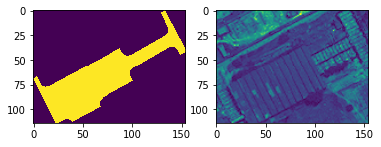

(39063950L,)
(8L, 39063950L)
-----------------------------------------

image for OSM-way-34627045 is good object: 317
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


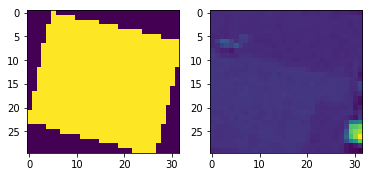

(39064910L,)
(8L, 39064910L)
-----------------------------------------

image for OSM-way-282627179 is good object: 318
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


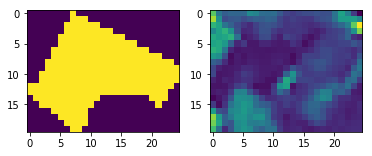

(39065410L,)
(8L, 39065410L)
-----------------------------------------

image for OSM-way-59528640 is good object: 319
2016-05-17T07:55:44.718Z
10300100543AA700
Building


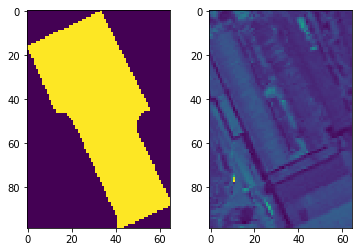

(39071845L,)
(8L, 39071845L)
-----------------------------------------

image for OSM-way-159641099 is good object: 320
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


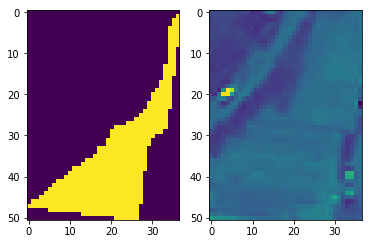

(39073732L,)
(8L, 39073732L)
-----------------------------------------

image for OSM-way-142657226 is good object: 321
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


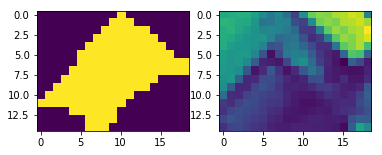

(39074017L,)
(8L, 39074017L)
-----------------------------------------

image for OSM-way-160597864 is good object: 322
2016-05-17T07:55:44.718Z
10300100543AA700
Building


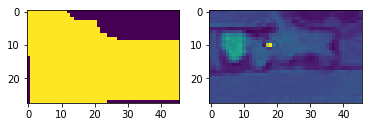

(39075305L,)
(8L, 39075305L)
-----------------------------------------

image for OSM-way-25753200 is good object: 323
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


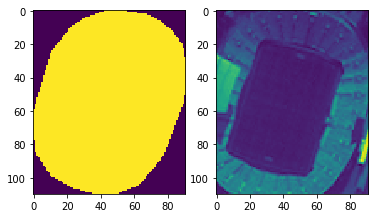

(39085315L,)
(8L, 39085315L)
-----------------------------------------

image for OSM-way-34990167 is good object: 324
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


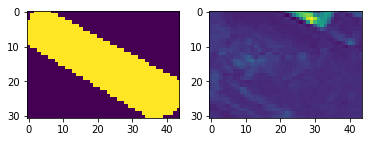

(39086679L,)
(8L, 39086679L)
-----------------------------------------

image for OSM-way-34149530 is good object: 325
2016-05-17T07:55:44.718Z
10300100543AA700
Building


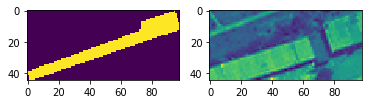

(39091089L,)
(8L, 39091089L)
-----------------------------------------

image for OSM-way-62143974 is good object: 326
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


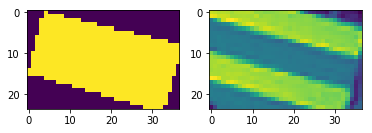

(39091977L,)
(8L, 39091977L)
-----------------------------------------

image for OSM-way-61112984 is good object: 327
2016-05-17T07:55:44.718Z
10300100543AA700
Building


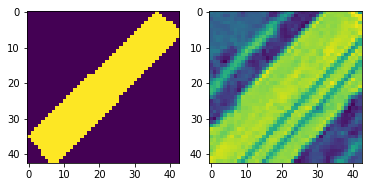

(39093826L,)
(8L, 39093826L)
-----------------------------------------

image for OSM-way-58436916 is good object: 328
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


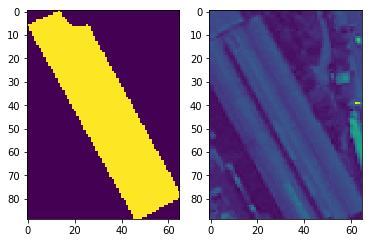

(39099611L,)
(8L, 39099611L)
-----------------------------------------

image for OSM-way-92024807 is good object: 329
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


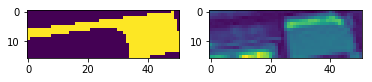

(39100427L,)
(8L, 39100427L)
-----------------------------------------

image for OSM-way-78295172 is good object: 330
2016-05-17T07:55:44.718Z
10300100543AA700
Building


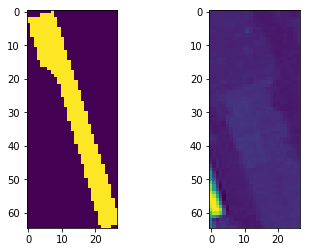

(39102182L,)
(8L, 39102182L)
-----------------------------------------

image for OSM-way-78242676 is good object: 331
2016-05-17T07:55:44.718Z
10300100543AA700
Building


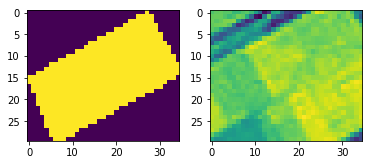

(39103232L,)
(8L, 39103232L)
-----------------------------------------

image for OSM-way-57792711 is good object: 332
2016-05-17T07:55:44.718Z
10300100543AA700
Building


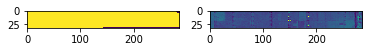

(39112384L,)
(8L, 39112384L)
-----------------------------------------

image for OSM-way-61652571 is good object: 333
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


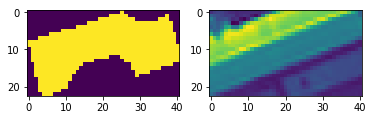

(39113327L,)
(8L, 39113327L)
-----------------------------------------

image for OSM-way-58436398 is good object: 334
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


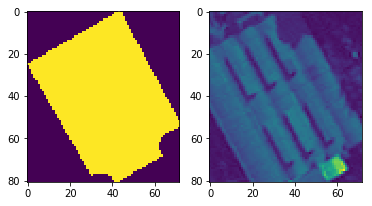

(39119159L,)
(8L, 39119159L)
-----------------------------------------

Multipolygon - skipping object: 335

-----------------------------------------

image for OSM-way-62145668 is good object: 336
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


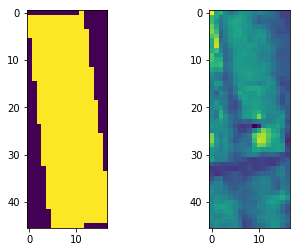

(39119941L,)
(8L, 39119941L)
-----------------------------------------

image for OSM-way-65372739 is good object: 337
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


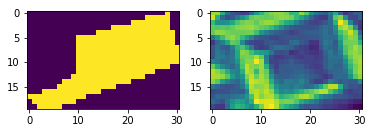

(39120561L,)
(8L, 39120561L)
-----------------------------------------

image for OSM-way-61977828 is good object: 338
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


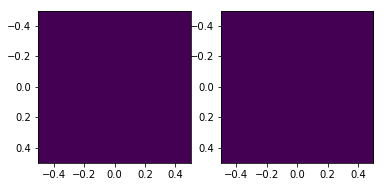

(39120562L,)
(8L, 39120562L)
-----------------------------------------

image for OSM-way-62154962 is good object: 339
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


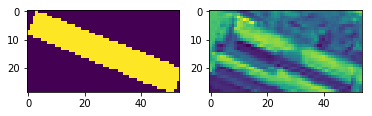

(39122128L,)
(8L, 39122128L)
-----------------------------------------

image for OSM-way-75614377 is good object: 340
2016-05-17T07:55:44.718Z
10300100543AA700
Building


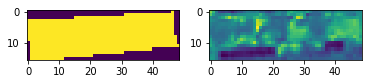

(39122912L,)
(8L, 39122912L)
-----------------------------------------

image for OSM-way-58791496 is good object: 341
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


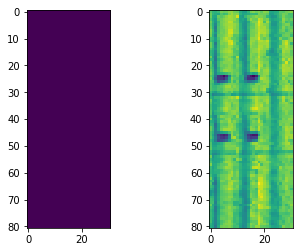

(39125423L,)
(8L, 39125423L)
-----------------------------------------

image for OSM-way-58426266 is good object: 342
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


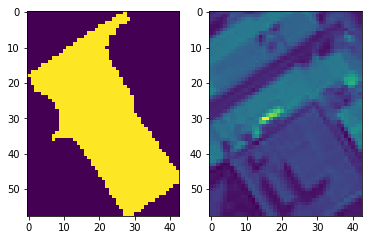

(39127917L,)
(8L, 39127917L)
-----------------------------------------

image for OSM-way-58756467 is good object: 343
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


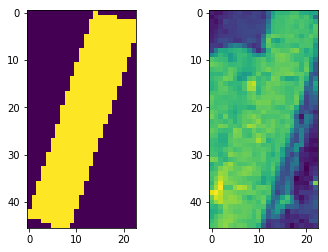

(39128975L,)
(8L, 39128975L)
-----------------------------------------

image for OSM-way-58109924 is good object: 344
2016-05-17T07:55:44.718Z
10300100543AA700
Building


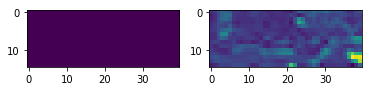

(39129575L,)
(8L, 39129575L)
-----------------------------------------

Multipolygon - skipping object: 345

-----------------------------------------

image for OSM-way-63759988 is good object: 346
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


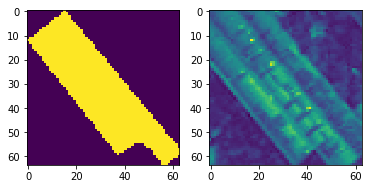

(39133607L,)
(8L, 39133607L)
-----------------------------------------

image for OSM-way-61153604 is good object: 347
2016-05-17T07:55:44.718Z
10300100543AA700
Building


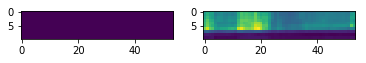

(39134147L,)
(8L, 39134147L)
-----------------------------------------

image for OSM-way-34148419 is good object: 348
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


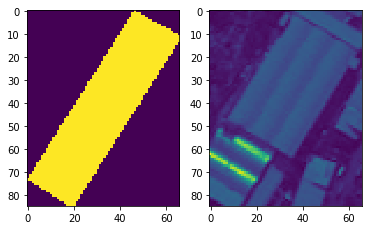

(39139757L,)
(8L, 39139757L)
-----------------------------------------

image for OSM-way-58756279 is good object: 349
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


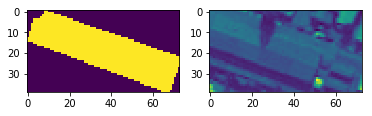

(39142604L,)
(8L, 39142604L)
-----------------------------------------

image for OSM-way-77767537 is good object: 350
2016-05-17T07:55:44.718Z
10300100543AA700
Building


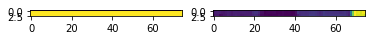

(39142829L,)
(8L, 39142829L)
-----------------------------------------

image for OSM-way-62144859 is good object: 351
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


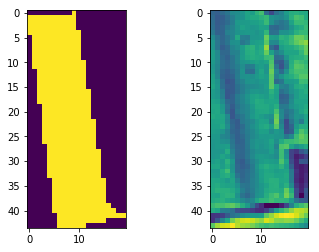

(39143709L,)
(8L, 39143709L)
-----------------------------------------

Multipolygon - skipping object: 352

-----------------------------------------

image for OSM-way-59572222 is good object: 353
2016-05-17T07:55:44.718Z
10300100543AA700
Building


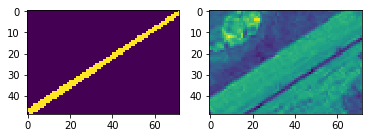

(39147237L,)
(8L, 39147237L)
-----------------------------------------

Multipolygon - skipping object: 354

-----------------------------------------

Multipolygon - skipping object: 355

-----------------------------------------

image for OSM-way-62364566 is good object: 356
2016-05-17T07:55:44.718Z
10300100543AA700
Building


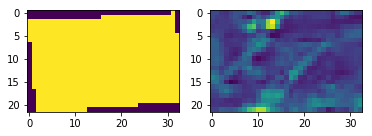

(39147963L,)
(8L, 39147963L)
-----------------------------------------

image for OSM-way-224230171 is good object: 357
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


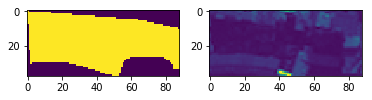

(39151307L,)
(8L, 39151307L)
-----------------------------------------

image for OSM-way-78298971 is good object: 358
2016-05-17T07:55:44.718Z
10300100543AA700
Building


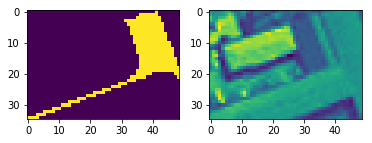

(39153022L,)
(8L, 39153022L)
-----------------------------------------

image for OSM-way-61606298 is good object: 359
2016-05-17T07:55:44.718Z
10300100543AA700
Building


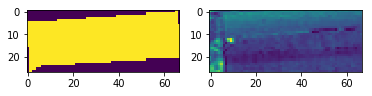

(39154831L,)
(8L, 39154831L)
-----------------------------------------

image for OSM-way-79093973 is good object: 360
2016-05-25T08:00:30.479Z
10300100570CBD00
Building


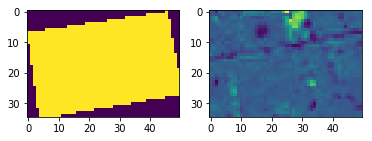

(39156581L,)
(8L, 39156581L)
-----------------------------------------

image for OSM-way-73349814 is good object: 361
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


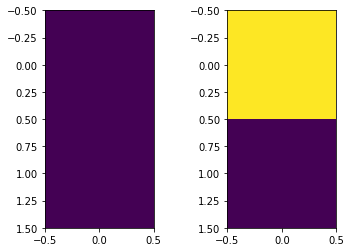

(39156583L,)
(8L, 39156583L)
-----------------------------------------

image for OSM-way-57716925 is good object: 362
2016-05-17T07:55:44.718Z
10300100543AA700
Building


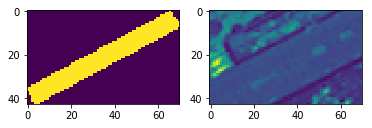

(39159593L,)
(8L, 39159593L)


In [16]:
################ this takes some time

from PIL import Image, ImageDraw
import copy
import numpy as np
    
for objects in selection_all.index:
    
    print '-----------------------------------------\n'
    ### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case
    park_utm = transform(project_utm, geom_list_selection_all[objects])  # apply projection
    
    # perform check # get x y coordinates of polygon and set a buffer if polygon is large enough
    if (park_utm.buffer(buffer_size).type != 'Polygon') | (park_utm.buffer(buffer_size).area == 0):
        
        message = "Multipolygon - skipping"
        
        print message + ' object: ' + str(objects) +'\n'
    
    else: 
        
        x,y = park_utm.buffer(buffer_size).exterior.xy

        park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection  

        # get wgs projected x,y coordinates and create bounding box for image aquisition
        x_wgs,y_wgs = park_buffer_wgs.exterior.xy
        
        bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)

        bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

        bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)

        # convert bounding box to well known format usable by GBDX tools
        bbox_wkt = box(*bbox_park_area_float).wkt

        selection_images = nf.image_query_check(bbox_wkt,park_utm,buffer_size,project_wgs,x_wgs,y_wgs)

        if not selection_images.empty:
            
            # set park bounding box 
            bbox = env.inputs.get('bbox', bbox_park_area_str)

            # set catalog id from selection
            catalog_id = env.inputs.get('catalog_id', selection_images.id[0])

            # collect image
            image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),
                                 proj=UTM_EPSG_code,pansharpen=False)

            #create array from GBDX image
            image_array = image[:,:,:].read()

            # get second band to see if image is defective (some images show only black)
            # use image if not defective, otherwise 
            if (image_array.size == 0):
                
                print('no image')
            
            elif (image_array[1,:,:].min() != 0) :
                
                
                print 'image for ' + selection_all.OSM_id[objects] + ' is good object: ' + str(objects )
                print image.ipe_metadata["image"]["acquisitionDate"]
                print image.cat_id
                print selection_all.item_type[objects]
                print 'Master Type: %s' % dict_type[selection_all.item_type[objects]]

                # resize polygon and plot polygon over image
                # subtract minimal values from utm polygon x and y to set 0,0 point as start 
                x1 = np.subtract(x, min(x))
                y1 = np.subtract(y, min(y))

                # devide the x and y coordinate of the polygon by the size of the image to match both sizes 
                x2 = np.divide(x1,max(x1)/image.shape[2])
                y2 = np.divide(y1,max(y1)/image.shape[1])

                n_bands, rows, cols  = image.shape

                # calculate total cells for each class by masking and setting pixel values to 1

                # create sequence of edited x and y coordinates, width and heigth  for use in ImageDraw function
                polygon = [(x2[i], y2[i]) for i in range(len(x2))]
                width = image.shape[2]
                height = image.shape[1]
                                                                   
                # convert polygon coordinates to raster/array values using ImageDraw
                img = Image.new('L', (width, height), 0)
                ImageDraw.Draw(img).polygon(polygon, fill=dict_type[selection_all.item_type[objects]])
               
                # convert image to array and set as mask
                mask = np.array(img)

                # flip the array for matching with the mask array
                image_array_flipped = np.fliplr(image_array[:,:,:])
                reshaped_data = image_array_flipped.reshape(8,(rows*cols))
                reshaped_label = mask.reshape(1,(rows*cols))
                
                # check if this is the first iteration, if so add the first data set otherwise:
                # append the new image data to the other data
                if data_all.size == 0:
                    
                    data_all = reshaped_data 
                    
                else: 
                    
                    data_all = np.concatenate((data_all,reshaped_data), axis = 1)
                
                label_all = np.append(label_all,reshaped_label)
                
                # Two subplots, the axes array is 1-d
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(mask)
                axarr[1].imshow(image_array_flipped[1])
                
                
                plt.show()
            
                print label_all.shape
                print data_all.shape
             
                
            else:
                
                print 'image defective' 
                # move to next without doing analysis

        else:

            print 'no image' 
            # move to next without doing analysis      
            
################ this takes a long time


In [17]:
### Remove pixels without class

label_all_no0 = label_all[label_all != 0]
data_all_no0 = data_all[:,label_all != 0]

In [18]:
with open(os.path.join(pick, 'label_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(label_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'data_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(data_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)